# T-Test


Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources:
- Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/
- Gureckis, 2018
https://teaching.gureckislab.org/fall22/labincp/intro.html

## T-Test

The T-test (or Student’s t-test) tests if there is a difference between two continuous variables’ means.

Therefore, the predictor (IV) is categorical, but the outcome (DV) is continuous.

There are 3 Types of t-tests:

1. One sample t-test - compares a mean to a number
2. Independent sample t-test - compares two means from different groups
3. Paired sample t-test - compares two means from same group (pre-post)

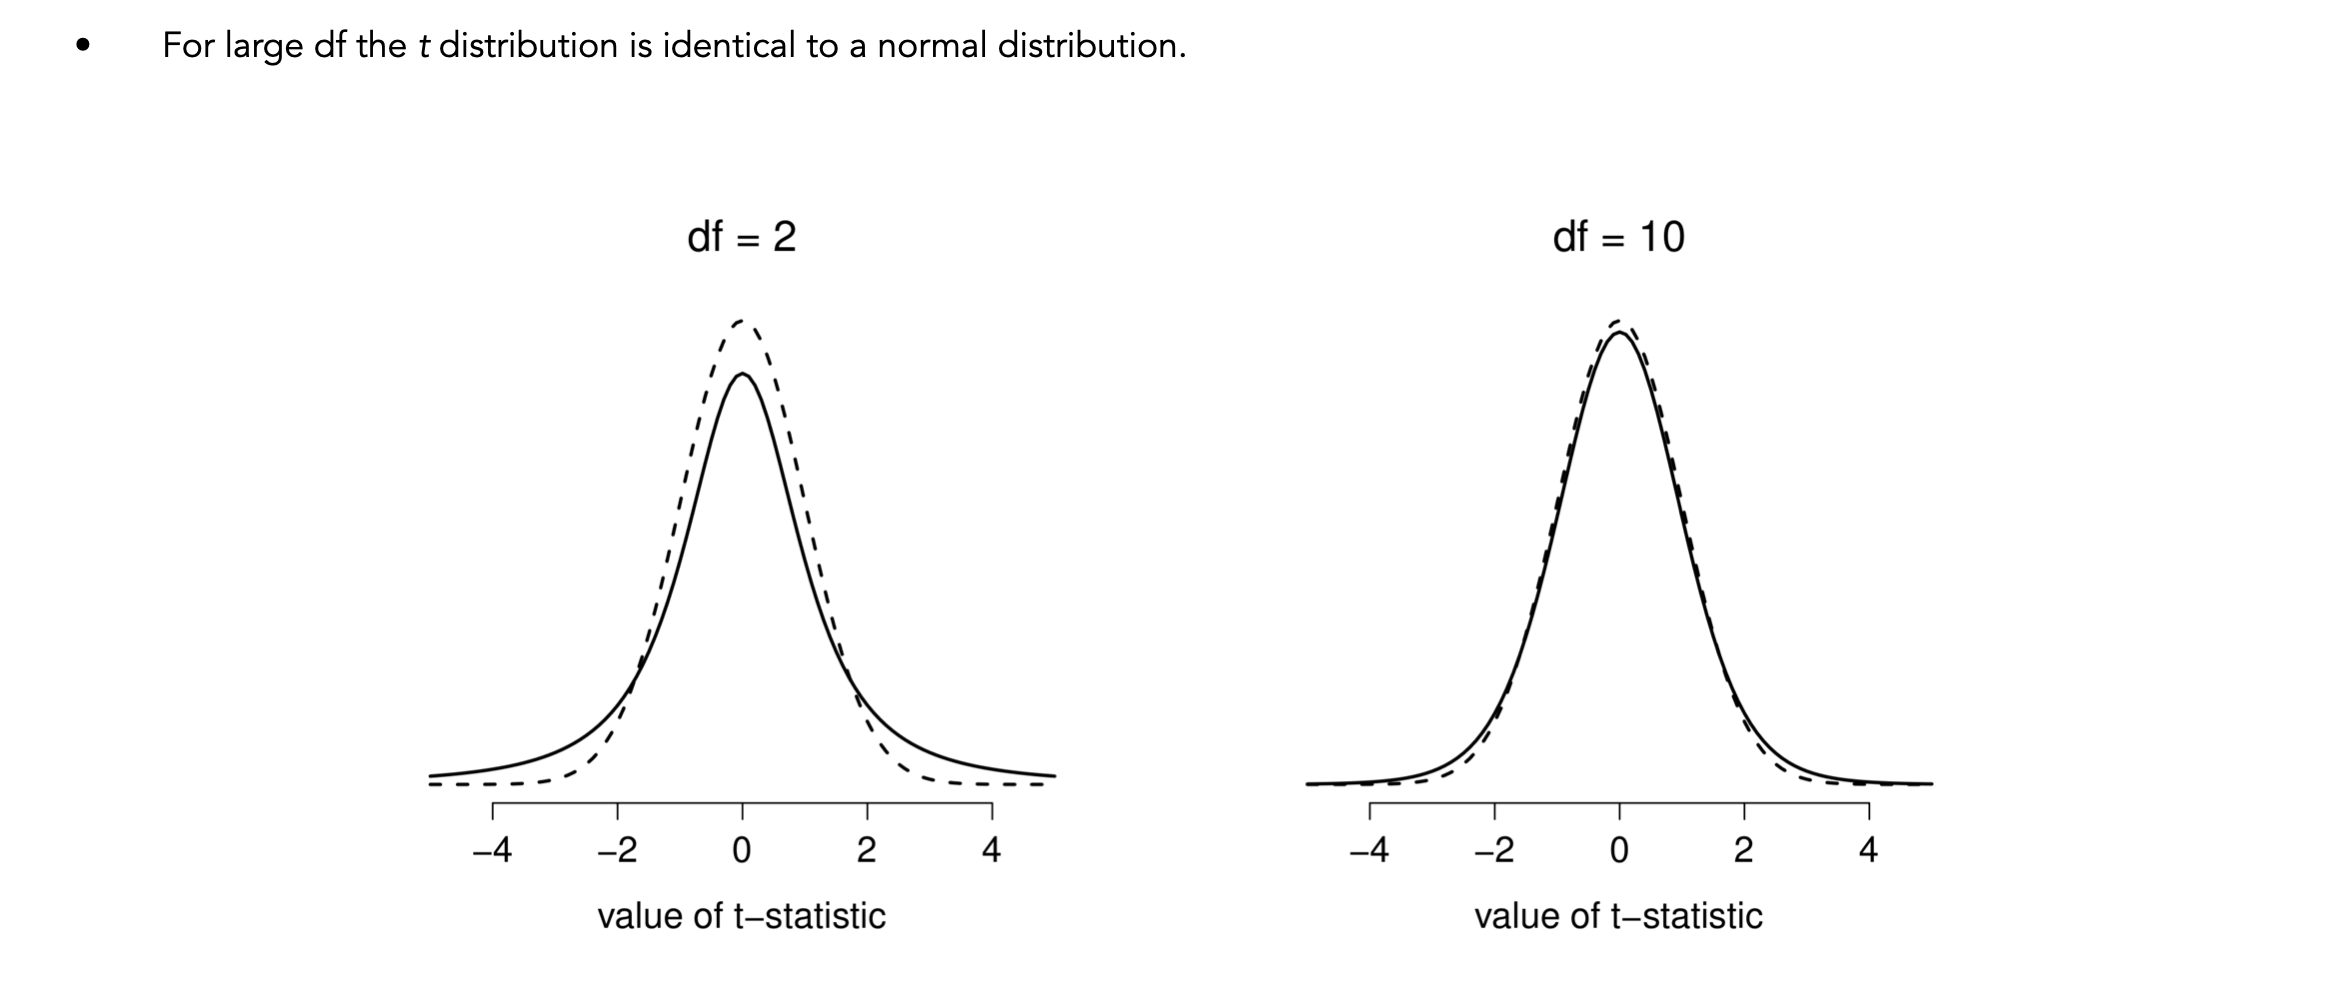

In [1]:
# import libraries

import numpy as np
import statsmodels.api as sm
import pylab as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon


In [2]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data.xlsx
#df = pd.read_excel('data.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data.xlsx'
df = pd.read_excel(url)

df.head(2)

Response ID  GENDER  AGE  PARTY  TWITTER  TRUST  RU1  RU2  RU3  RU4  \
0  R_0cj5dsJg2wfpiuJ       1   18      1        0     95  4.0   26    0   -5   
1  R_0rkhLjwWPHHjnTX       0   19      2        1     76 -5.0   16    3   -1   

   ...  Post23  Post24  Post25  Post26  Post27  Post28  Post29  Post30  \
0  ...      69      60      20      58      84      22      42      77   
1  ...      58      82      38      61      36      40      62      68   

   Post31  Post32  
0      90      71  
1      46      43  

[2 rows x 102 columns]

In [3]:
# create a new variable "trustD" that selects the trust in science "TRUST" of all Democrats ('PARTY==1')
trustD = df.query('PARTY==1')['TRUST']

# create a new variable "trustr" that selects the trust in science "TRUST" of all Republicans ('PARTY==2')
trustR = df.query('PARTY==2')['TRUST']

## 1 Sample t-test

The one sample t-test compares a mean to a number.


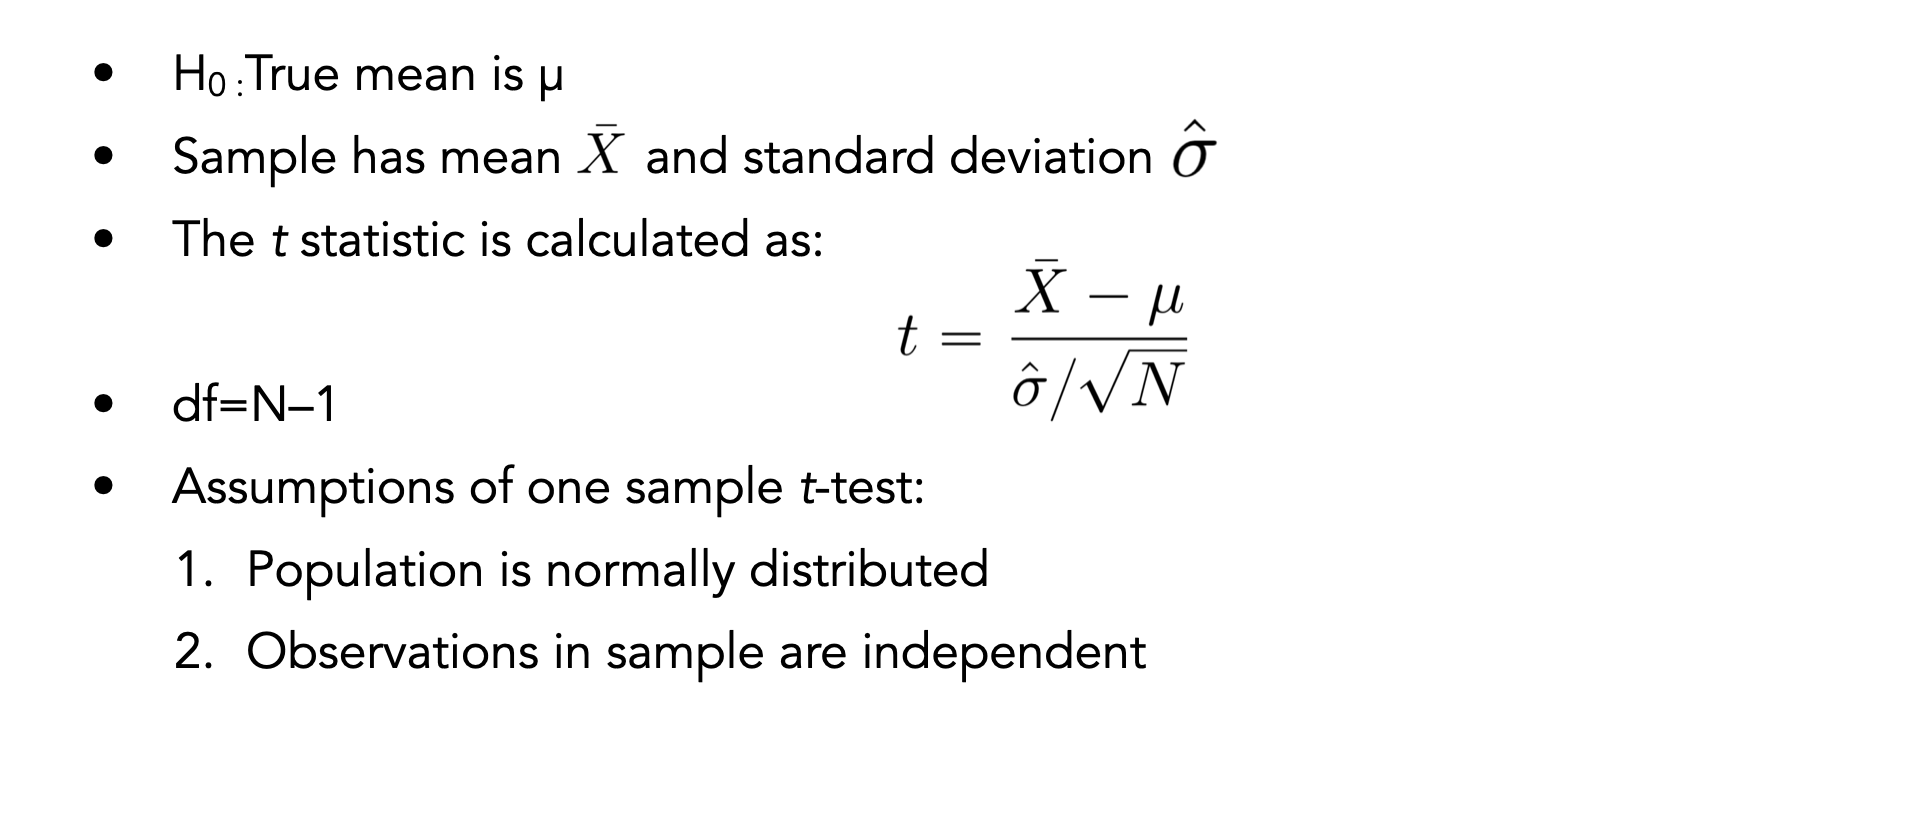

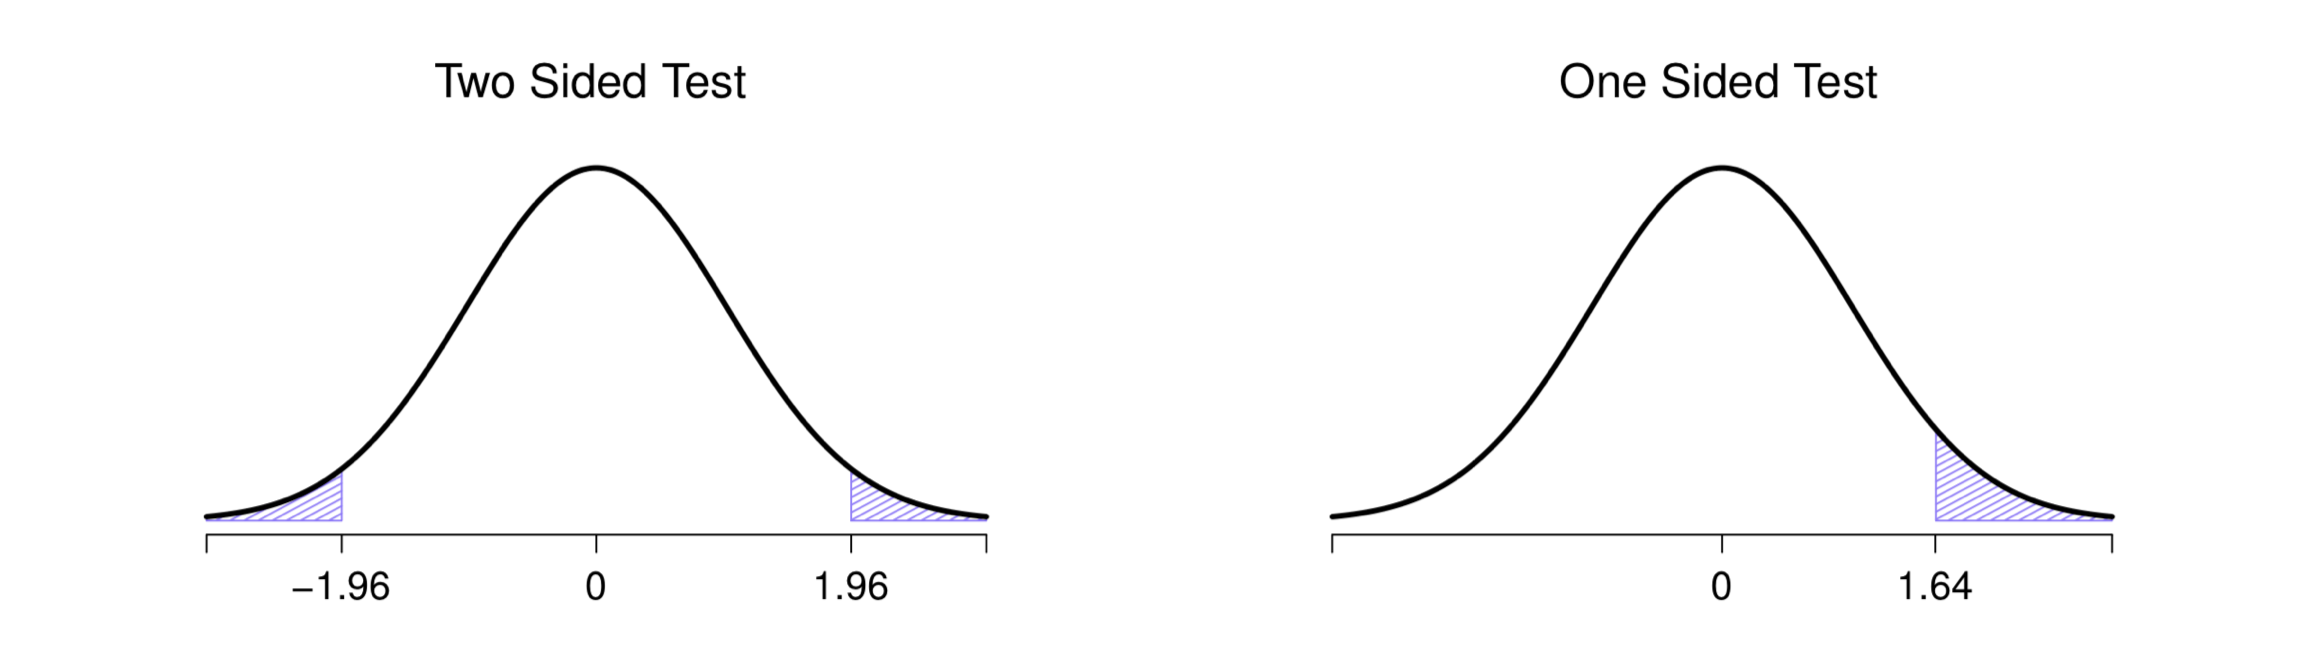

### Example: Do Democrats trust in science (above chance, if chance is 75)?
In other words, is the mean of Democrats' trust in science higher than 75?

/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_96947/914974243.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trustD, hist=True, norm_hist=True, kde=True, bins=10, color = '#327AAE', ax=ax)


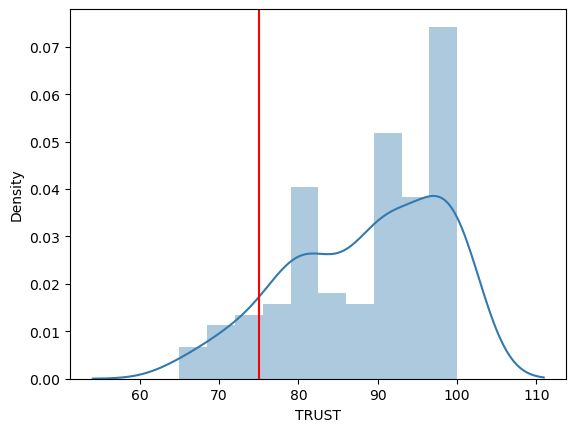

In [4]:
# plot the distribution of trustD

# create a figure with one by one panels
fig, ax = plt.subplots(1,1)

# plot the histogram of trustD using distplot in the library seaborn
sns.distplot(trustD, hist=True, norm_hist=True, kde=True, bins=10, color = '#327AAE', ax=ax)

# you can draw a line through the x=75 to see what you are comparing the distribution of trustD to
plt.axvline(x = 75, color = 'r', label = 'axvline - full height')

#save the figure
plt.savefig('trustD.png', dpi=300, format="png")

In [5]:
# check the mean of Democrats' trust in science (trustD)

trustD.mean()

88.59055118110236

In [6]:
# check the standard deviation (estimate of population parameter) of the variable trustD

trustD.std()

9.591956228891103

In [7]:
# check how many datapoints are in the variable trustD

len(trustD)

127

In [8]:
# compute the t statistic for a one sample ttest checking if trustD is different from 75

(88.59-75)/(9.59/np.sqrt(127))

15.969918876919223

In [9]:
# run the one sample ttest of whether trustD is significantly different from 75 (output is t statistic and p value)

stats.ttest_1samp(trustD, popmean=75)

TtestResult(statistic=15.967309469564503, pvalue=4.6210603828739616e-32, df=126)

Assumptions of one sample t-test:
1. Population is normally distributed
2. Observations in sample are independent


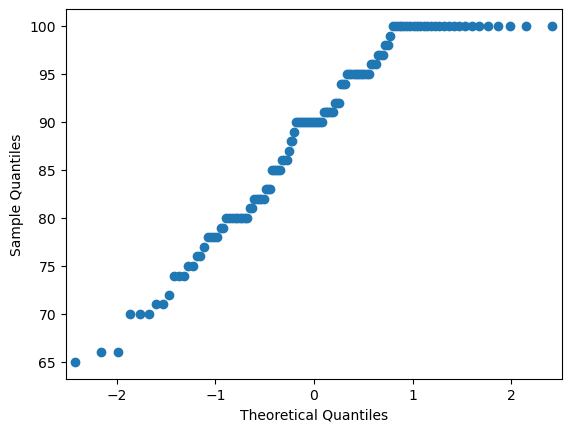

In [10]:
# in the histogram above, it doesn't look like trustD is normally distributed
# to formally test for normality, draw a qq plot:
# if normally distributed, the output should be a straight diagonal line

sm.qqplot(trustD)
py.show()

In [11]:
# quantitatively test whether a variable is normally distributed using the Shapiro test
# if this test is significant, then the variable is not normally distributed

shapiro_test = stats.shapiro(trustD)
shapiro_test

ShapiroResult(statistic=0.922909140586853, pvalue=2.002060000450001e-06)

It looks like Democrats' trust in science is not normally distributed in this dataset, given the non-linear looking qqplot and the sigificant Shapiro test. What now?

In [12]:
# for nonnormal data, instead of the one sample ttest we can run a Wilcoxon test
# Wilcoxon test is a non-parametric version of the one sample T-test
# the output is the statistic and the p value
# by default compares trustD to 0

res = wilcoxon(trustD)
res.statistic, res.pvalue

(0.0, 1.1993576441771922e-22)

In [13]:
# if you want to compare trustD to another number, like 75, subtract it in the test:
# compares trustD to 0

res = wilcoxon(trustD - 75)
res.statistic, res.pvalue

(229.0, 5.547779859138368e-20)

In [14]:
wilcoxon(trustD - 75)

WilcoxonResult(statistic=229.0, pvalue=5.547779859138368e-20)

## 2 Sample t-test or Independent sample t-test or Between subjects t-test

The Independent sample t-test compares two means from different groups.

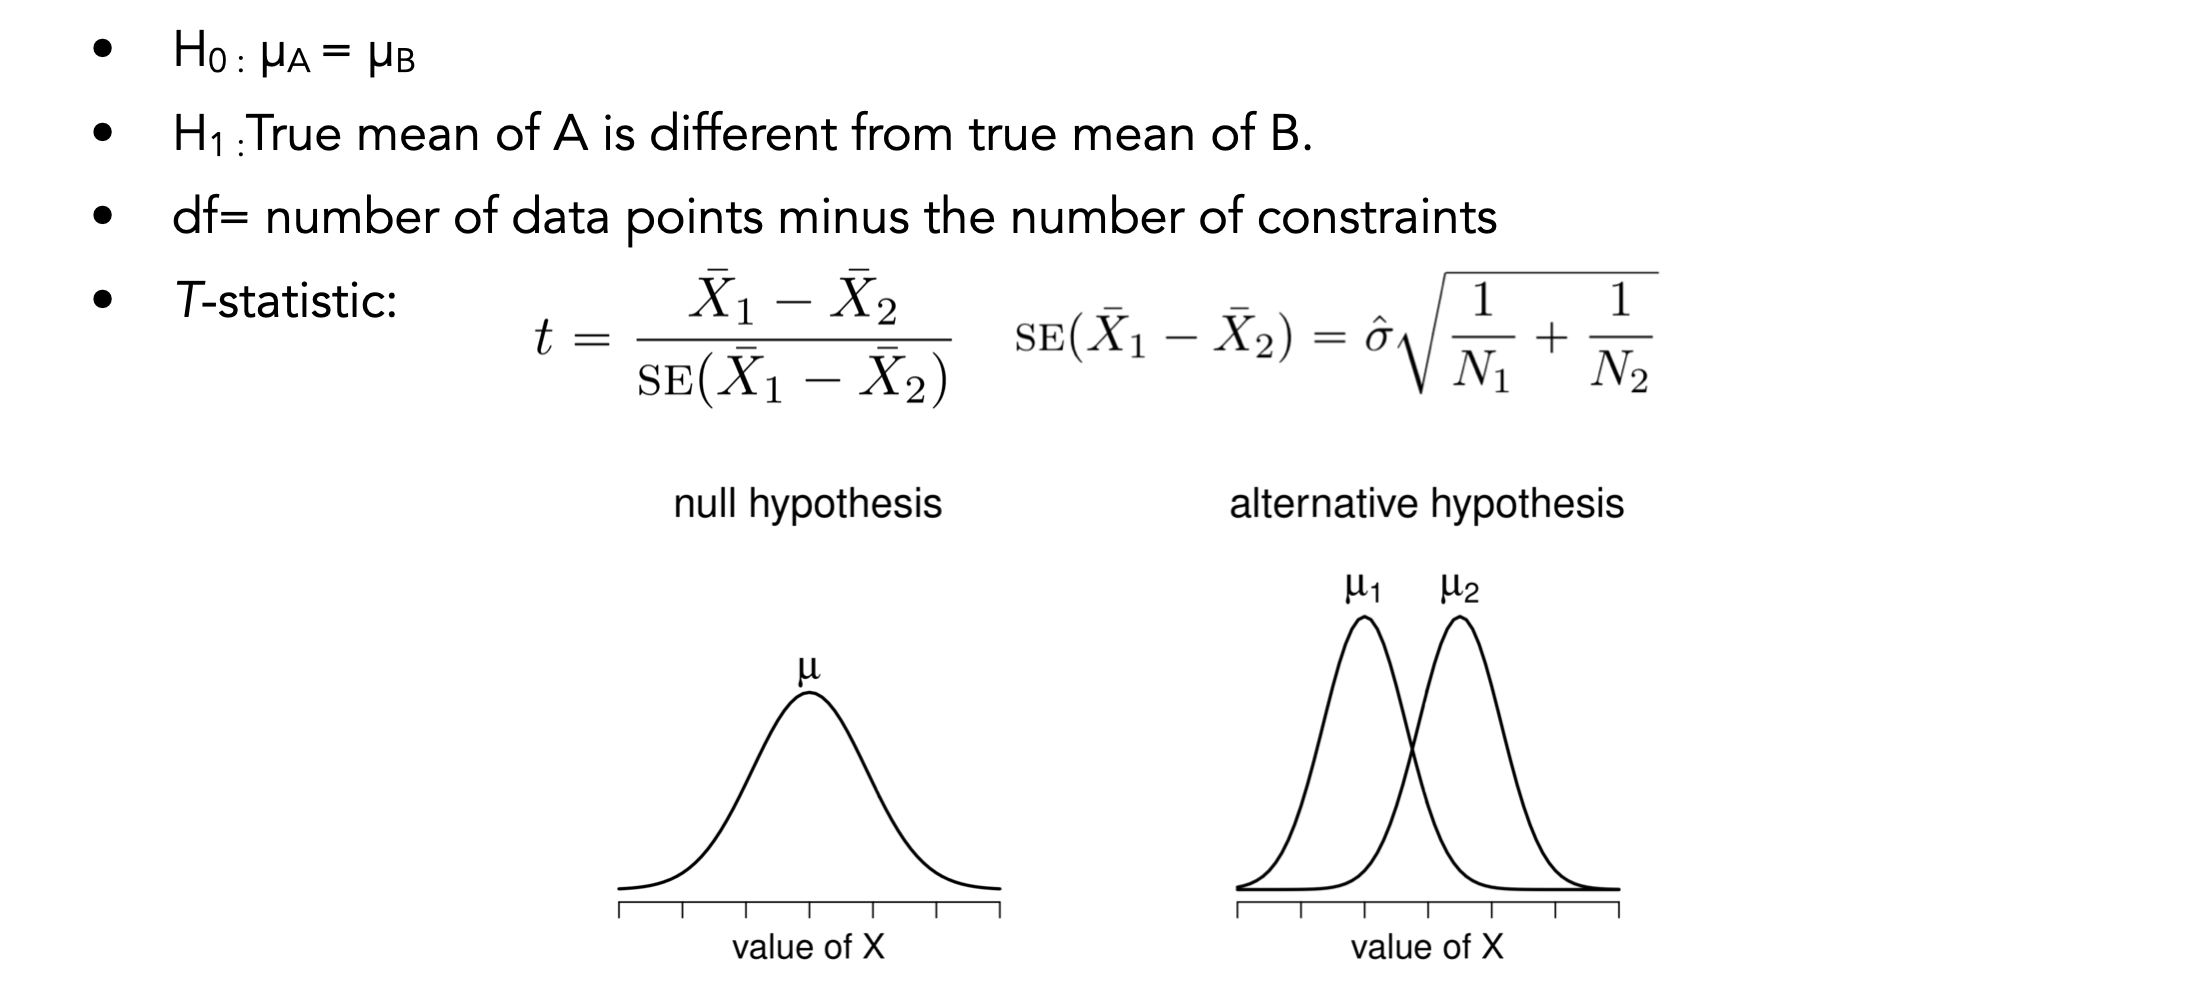

### Example: Are Democrats different from Republicans in how much they trust in science?

<Axes: xlabel='PARTY', ylabel='TRUST'>

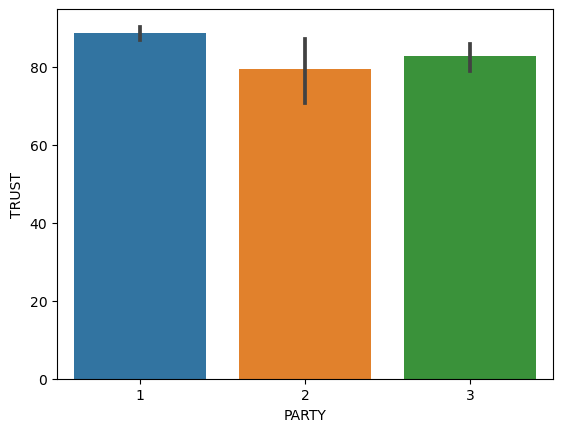

In [15]:
# make a figure that plots trust in science "TRUST" as a function of party affiliation "PARTY"

sns.barplot(x="PARTY", y="TRUST", data=df)

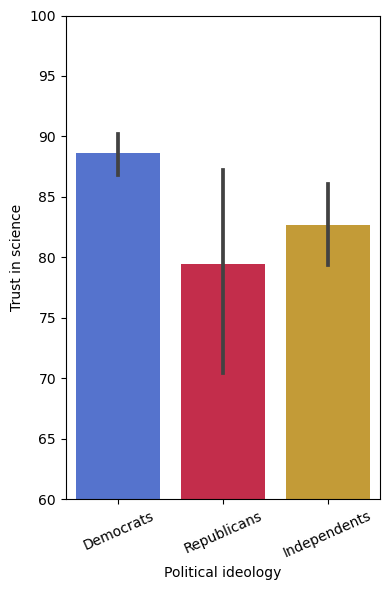

In [16]:
# let's make the same figure as above but customize it:

# Choose bar colors: https://sites.google.com/view/paztronomer/blog/basic/python-colors
colors = ["royalblue", "crimson", "goldenrod"]

# Create the figure specifying number of subplots and size (in inches)
fig, ax = plt.subplots(1,1, figsize=(4,6))

# Plot the bars
sns.barplot(x="PARTY", y="TRUST", data=df, palette=colors, ax=ax)

# Label the x and y axis
ax.set_ylabel('Trust in science')
ax.set_xlabel('Political ideology')
ax.set_xticklabels(['Democrats', 'Republicans', 'Independents'], rotation=24)

# Set the y limits
ax.set_ylim(60,100)

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()


/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_96947/3661408836.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('PARTY==1')['TRUST'], hist=True, norm_hist=True, kde=True, bins=10, color = '#327AAE', ax=ax)
/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_96947/3661408836.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.gith

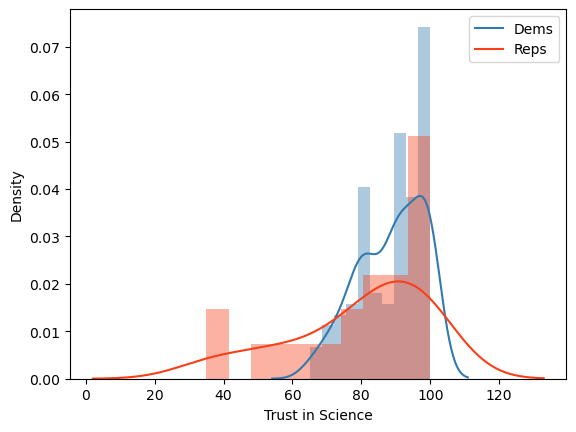

In [17]:
# Let's say you want to compare Democrats with Republicans on the trust in science variable
# Let's first look at the distributions of these variables

# make a figure
fig, ax = plt.subplots(1,1)

# plot Democrats' trust histogram
sns.distplot(df.query('PARTY==1')['TRUST'], hist=True, norm_hist=True, kde=True, bins=10, color = '#327AAE', ax=ax)

# plot Republicans' trust histogram in the same graph
sns.distplot(df.query('PARTY==2')['TRUST'], hist=True, norm_hist=True, kde=True, bins=10, color = '#F93F17', ax=ax)

# label the x axis
ax.set_xlabel('Trust in Science')

# include a legend
plt.legend(['Dems','Reps'])

# save the figure
plt.savefig('trust.png', dpi=300, format="png")

/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_96947/2675075539.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('PARTY==1')['TRUST'], hist=True, norm_hist=True, kde=True, bins=10, color = '#327AAE', ax=ax[0])
/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_96947/2675075539.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.g

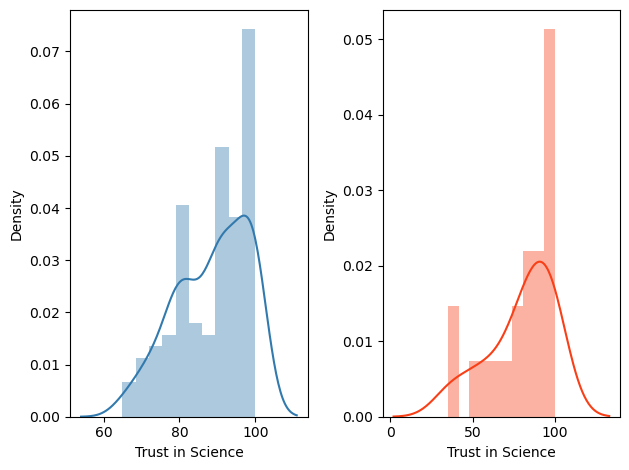

In [18]:
# if you want to plot the 2 distribution in separate panels

# make the figure with 2 subplots: one row and 2 columns
fig, ax = plt.subplots(1,2)

# plot Democrats' histogram in the first panel by specifying ax=ax[0]
sns.distplot(df.query('PARTY==1')['TRUST'], hist=True, norm_hist=True, kde=True, bins=10, color = '#327AAE', ax=ax[0])

# plot Republicans' histogram in the second panel by specifying ax=ax[1]
sns.distplot(df.query('PARTY==2')['TRUST'], hist=True, norm_hist=True, kde=True, bins=10, color = '#F93F17', ax=ax[1])

# label the x axis of the first and second panels
ax[0].set_xlabel('Trust in Science')
ax[1].set_xlabel('Trust in Science')

# make sure the two panels don't overlap
plt.tight_layout()

# save the figure
plt.savefig('trust.png', dpi=300, format="png")


In [19]:
# run an independent sample ttest (between subjects ttest) testing for differences in trust in science between Republicans and Democrats
# the output is the t statistic and the p value

stats.ttest_ind(trustD, trustR)

Ttest_indResult(statistic=3.327609101320773, pvalue=0.0011085288899397457)

In [20]:
# Let's create a function ttest_ind that reports the Cohen D effect size, degrees of freedom, confidence intervals:

def ttest_ind(x1, x2, equivar=False, alpha=0.05, printres=False):
    n1 = len(x1)
    M1 = np.mean(x1)
    s1 = np.std(x1, ddof=1)
    n2 = len(x2)
    M2 = np.mean(x2)
    s2 = np.std(x2, ddof=1)

    # t-test
    [t, p] = stats.ttest_ind(x1, x2, equal_var=equivar)
    # cohen's d
    dof = n1 + n2 - 2
    sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / dof)
    d = np.abs(M1 - M2) / sp
    # degrees of freedom
    df = (s1**2/n1 + s2**2/n2)**2 / ((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))
    # confidence intervals (M1 - M2) ± ts(M1 - M2)
    se = np.sqrt(sp**2/n1 + sp**2/n2)
    CI = (M1 - M2) + np.array([-1,1])*stats.t.ppf(1-alpha/2, df, loc=0, scale=1)*se

    res = (t, df, p, d, CI[0], CI[1])
    if printres:
        print("t = %.5f, df = %.5f, p = %.5f, d = %.5f, CI = (%.5f, %.5f)" % res)
    else:
        return res

In [21]:
# Run an independent sample t-test using this newly created function
res = ttest_ind(trustD, trustR)
print("t = %.5f, df = %.5f, p = %.5f, d = %.5f, CI = (%.5f, %.5f)\n" % res)

t = 2.03205, df = 21.51737, p = 0.05468, d = 0.78388, CI = (3.42660, 14.80212)



Assumptions of indepednent samples t-test:
1. Populations are normally distributed
2. Observations in samples are independent
3. The standard deviations are the same in both populations (homoscedasticity) - if this assumption is violated you should make sure to run the independent samples t-test Welch test. However, in Python this is the default anyway.

## Checking for assumption of normality


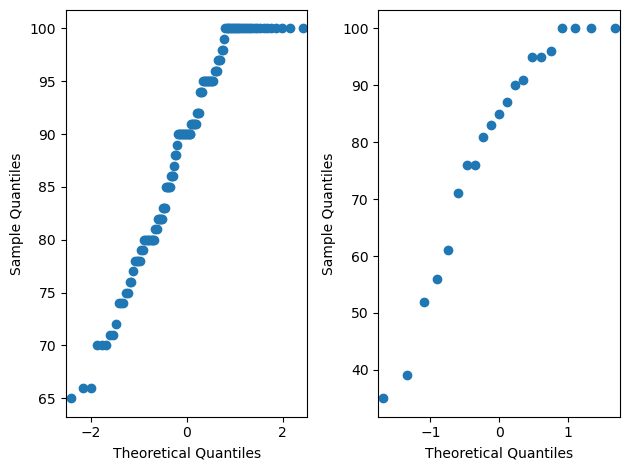

In [22]:
# make QQ plot to visually check if a variable is normally distributed
# if normally distributed, the output should be a straight diagonal line

fig, ax = plt.subplots(1,2)

sm.qqplot(trustD, ax=ax[0])
sm.qqplot(trustR, ax=ax[1])

plt.tight_layout()

py.show()

In [23]:
# quantitatively test whether a variable is normally distributed using the Shapiro test
# if this test is significant, then the variable is not normally distributed

shapiro_test = stats.shapiro(trustD)
shapiro_test

ShapiroResult(statistic=0.922909140586853, pvalue=2.002060000450001e-06)

In [24]:
# quantitatively test whether a variable is normally distributed using the Shapiro test
# if this test is significant, then the variable is not normally distributed

shapiro_test = stats.shapiro(trustR)
shapiro_test

ShapiroResult(statistic=0.8777187466621399, pvalue=0.013254587538540363)

In [25]:
# since trust in science is not normally distributed (as assumed by the independent sample t-test) we have to run a non parametric test instead
# one option is the Mann–Whitney U test

stats.mannwhitneyu(x=trustD, y=trustR)

MannwhitneyuResult(statistic=1612.0, pvalue=0.12441433916658333)

## Paired sample t-test (Within subject t-test)

Used for repeated measures designs (pre-post, before-after).

It’s constructed as a one-sample t-test, but applied to the difference between two variables.

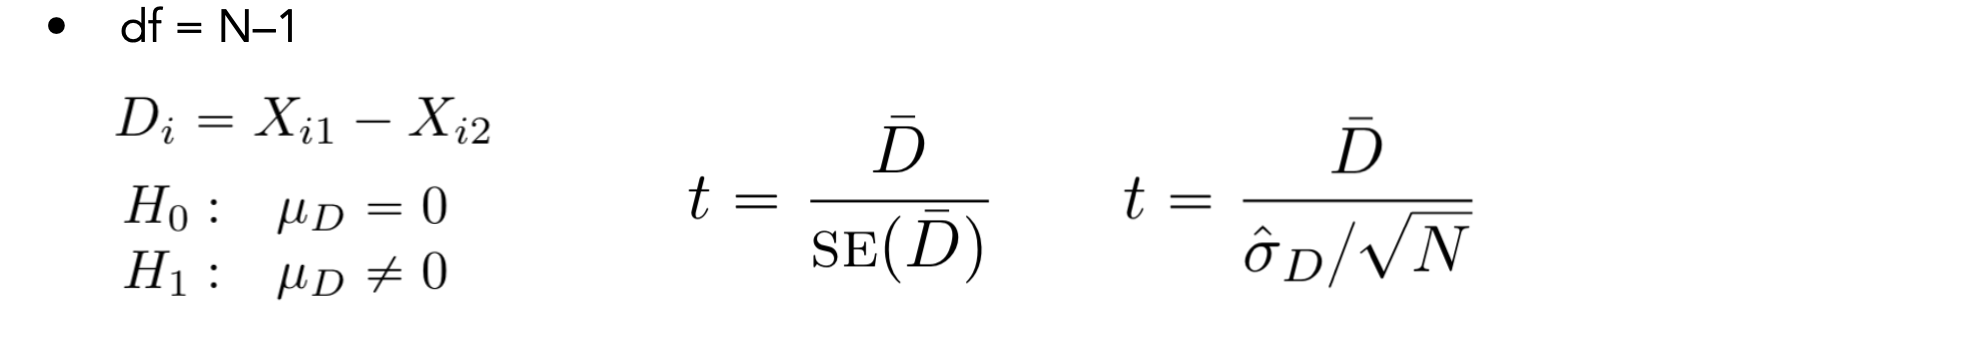

Example: compare pretest beliefs to posttest beliefs, to see if the manipulation (evidence) changed participants' beliefs

let's first plot the variables we are comparing

In [26]:
df

Response ID  GENDER  AGE  PARTY  TWITTER  TRUST   RU1  RU2  RU3  \
0    R_0cj5dsJg2wfpiuJ       1   18      1        0     95   4.0   26    0   
1    R_0rkhLjwWPHHjnTX       0   19      2        1     76  -5.0   16    3   
2    R_10BMNpjhInMfUeO       1   18      1        1     86  -5.0   -2    5   
3    R_120iGR6WlLnbZnI       0   22      1        0     95  23.0  -10  -40   
4    R_12qW8cDY0bNlId2       0   19      3        0     76  18.0  -12    1   
..                 ...     ...  ...    ...      ...    ...   ...  ...  ...   
195  R_xapQxguTwA3Juh3       1   18      1        0     76 -13.0    3    3   
196  R_XMS13V10vkvYag9       1   18      3        0     76 -12.0    5   -7   
197  R_ykkxJ7f40bzTEaZ       1   19      1        0     89  -3.0   14   14   
198  R_ZDXFN47SOcbCJpv       0   21      2        0    100  10.0   15   -3   
199  R_ZpYHWVd91u6fjBT       0   19      1        0     66   7.0   27   11   

     RU4  ...  Post23  Post24  Post25  Post26  Post27  Post28  Post29  Post30  \
0     -5  ...      69      60      20      58      84      22      42      77   
1     -1  ...      58      82      38      61      36      40      62      68   
2      5  ...      35      46      39      65      44      42      53      55   
3     22  ...      14      76      20      61      87      82      63      19   
4     16  ...      17      81      31      83      82      76      43      33   
..   ...  ...     ...     ...     ...     ...     ...     ...     ...     ...   
195  -32  ...      56      69       2      68      68      61      71      17   
196   -4  ...      44      44      26      40      34      37      35      65   
197  -13  ...      57      23      26      83      44      44      66      35   
198    5  ...      33      29      66      77      64      69      24      23   
199   39  ...      56      40      26      37      35       9      24      37   

     Post31  Post32  
0        90      71  
1        46      43  
2        45      35  
3        97      37  
4        82      47  
..      ...     ...  
195      82      27  
196      44      35  
197      32      75  
198      81      24  
199      33      67  

[200 rows x 102 columns]

In [27]:
# because the barplot needs data in long format, we have to transform from wide to long
# use the function melt to transform the wide format data to long format

df_long = pd.melt(df.loc[:, ['Response ID', 'Pre1', 'Post1']],
                  id_vars=['Response ID'],
                  var_name='TimePoint',
                  value_name='Belief')
df_long

Response ID TimePoint  Belief
0    R_0cj5dsJg2wfpiuJ      Pre1    83.0
1    R_0rkhLjwWPHHjnTX      Pre1    66.0
2    R_10BMNpjhInMfUeO      Pre1    67.0
3    R_120iGR6WlLnbZnI      Pre1    74.0
4    R_12qW8cDY0bNlId2      Pre1    81.0
..                 ...       ...     ...
395  R_xapQxguTwA3Juh3     Post1    61.0
396  R_XMS13V10vkvYag9     Post1    72.0
397  R_ykkxJ7f40bzTEaZ     Post1    93.0
398  R_ZDXFN47SOcbCJpv     Post1    78.0
399  R_ZpYHWVd91u6fjBT     Post1    69.0

[400 rows x 3 columns]

(60.0, 80.0)

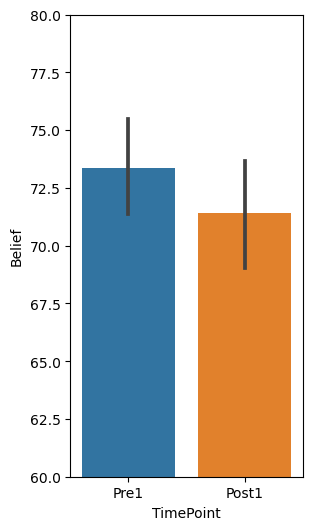

In [28]:
# Plot the bars you want to compare

fig, ax = plt.subplots(1,1, figsize=(3,6))
sns.barplot(x="TimePoint", y="Belief", data=df_long)
plt.ylim(60,80)

In [29]:
# Run a paired sample t-test (within subjects comparison)
# say we want to compare the pretest belief to the posttest belief
stats.ttest_rel(df.Pre1, df.Post1)

TtestResult(statistic=1.9546782252598949, pvalue=0.05202175922549497, df=199)

In [30]:
# Let's create a function ttest_rel that reports the Cohen D effect size, degrees of freedom, confidence intervals:

def ttest_rel(x1, x2, alpha=0.05, printres=False):
    n = len(x1)
    xd = x1 - x2
    Md = np.mean(xd)
    sd = np.std(xd, ddof=1)

    # t-test
    [t, p] = stats.ttest_rel(x1, x2)
    # cohen's d
    d = np.abs(Md) / sd
    # degrees of freedom
    df = n-1
    # confidence intervals Md ± ts(Md)
    CI = Md + np.array([-1,1])*stats.t.ppf(1-alpha/2, df, loc=0, scale=1)*sd/np.sqrt(n)

    res = (t, df, p, d, CI[0], CI[1])
    if printres:
        print("t = %.5f, df = %.5f, p = %.5f, d = %.5f, CI = (%.5f, %.5f)" % res)
    else:
        return res

In [31]:
# now let' run the paired t-test using the function we just created

ttest_rel(df.Pre1, df.Post1, printres=True)

t = 1.95468, df = 199.00000, p = 0.05202, d = 0.13822, CI = (-0.01712, 3.89022)


In [32]:
# for nonnormal data, instead of the paired sample ttest we can run a Wilcoxon signed-rank test
# Wilcoxon signed-rank test is a non-parametric version of the paired T-test
# the output is the statistic and the p value

res = wilcoxon(df.Pre1, df.Post1)
res.statistic, res.pvalue

(6883.5, 0.07139115148235033)

In [33]:
df.Pre1.mean()

73.35

In [34]:
df.Post1.mean()

71.41345

In [35]:
df.Pre1.std()

15.398802407261725

In [36]:
df.Post1.std()

17.56382015650209

## How do you report a t-test in a paper?

For example, this is how you would report the paired sample t-test we just ran:

"Ratings at Pretest (Mean=73.35, SD=15.39) were not significantly higher than ratings at Posttest (Mean=71.41, SD=17.56), t(199) = 1.95, p = .052, d = 0.138, CI[-0.017, 3.890]."

## Effect size

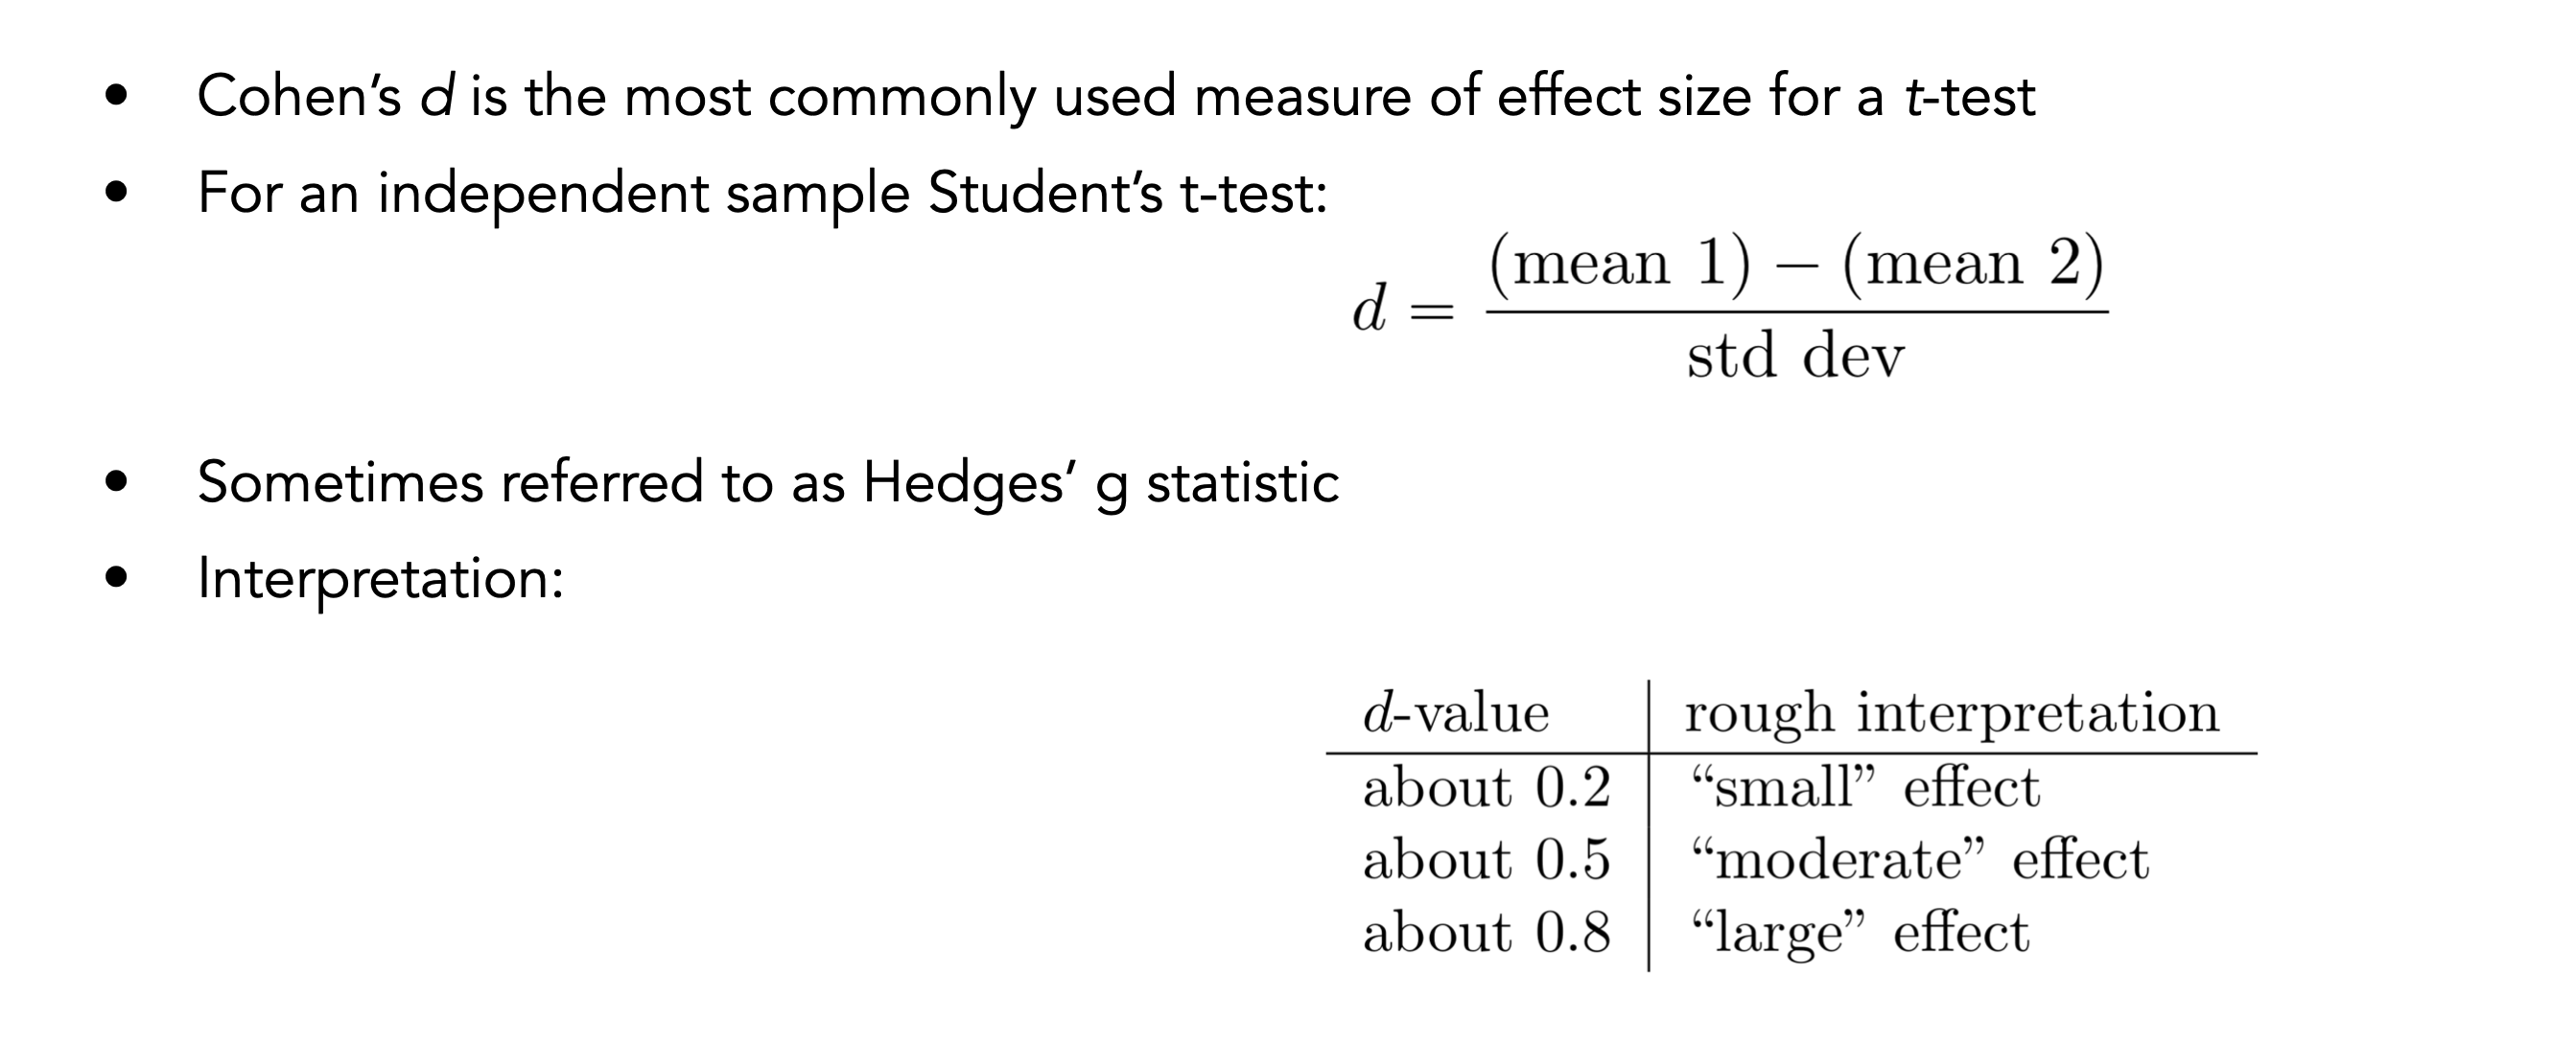

## Power analysis

Compute power with WebPower: https://webpower.psychstat.org/wiki/models/index

How to write the power analysis formally:

“For a power analysis we used the software webpower (Zhang & Yuan, 2018), and we calculated that in order to detect a small effect size of at least Cohen's D = 0.2, at a significance level of 0.05, in a paired sample comparison, with a power of 0.95, we need a sample size of 327 participants.”

Citation for webpower:
Zhang, Z., & Yuan, K.-H. (2018). Practical Statistical Power Analysis Using Webpower and R (Eds). Granger, IN: ISDSA Press.